In [3]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.mnist

In [5]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


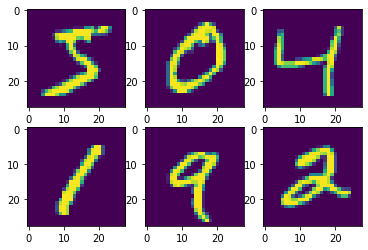

In [6]:
x_train,x_test = x_train/255.0 ,x_test/255.0
for i in range(6):
    plt.subplot(2,3
                ,i+1)
    plt.imshow(x_train[i])
plt.show()

In [38]:
x_train = x_train.reshape(-1,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [47]:

x_test = x_test.reshape(-1,28,28,1)
x_test.shape

(10000, 28, 28, 1)

In [31]:
# model = keras.models.Sequential()
# model.add(layers.Conv2D(30, (3,3), activation='relu', input_shape=(28,28,1)))
# model.add(layers.MaxPool2D((2,2)))
# # model.add(layers.Conv2D(76, 4, activation='relu'))
# # model.add(layers.MaxPool2D((2,2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(100, activation='relu'))
# model.add(layers.Dense(10 ,activation = 'sigmoid'))
# print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               507100    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_________________________________________________________________
None


In [48]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [49]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(lr=0.001)
metrics  = ["accuracy"]
model.compile(loss=loss, optimizer=optim, metrics=metrics)

In [50]:

epochs = 5

model.fit(x_train,y_train,epochs =epochs ,shuffle = True,verbose = 2)
model.evaluate(x_test,y_test,verbose = 2)

Epoch 1/5
1875/1875 - 46s - loss: 0.1530 - accuracy: 0.9557
Epoch 2/5
1875/1875 - 46s - loss: 0.0549 - accuracy: 0.9837
Epoch 3/5
1875/1875 - 47s - loss: 0.0357 - accuracy: 0.9890
Epoch 4/5
1875/1875 - 49s - loss: 0.0252 - accuracy: 0.9921
Epoch 5/5
1875/1875 - 47s - loss: 0.0157 - accuracy: 0.9948
313/313 - 3s - loss: 0.0464 - accuracy: 0.9865


[0.04639293998479843, 0.9865000247955322]

In [51]:
y_pred = model.predict(x_test)

In [52]:
y_classes  = [np.argmax(element) for element in y_pred]
y_classes[:5]

[7, 2, 1, 0, 4]

In [65]:
x_test = x_test.reshape(-1,28,28)
x_test.shape

(10000, 28, 28)

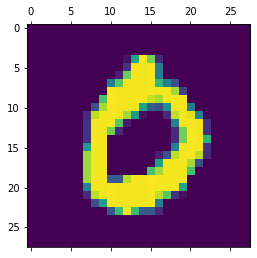

In [70]:
plt.matshow(x_test[3])